# Premier League
<p><img src="dataset/cov.png" alt="Cover" width="600px"></p>
The Premier League (legal name: The Football Association Premier League Limited) is the highest level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches (playing all other teams both home and away).Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures.<br>




### Importing Required Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.ensemble import *
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [48]:
df=pd.read_csv("dataset/football.csv")
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [49]:
df.isna().sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [50]:
df.duplicated().sum()

0

### **Step2**: Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [51]:
df.drop(columns=['Jersey Number'],inplace=True)

In [52]:
df[df['Age'].isna()]

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
241,Ezgjan Alioski,Leeds-United,Midfielder,NaN,NaN,1,1,0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0


In [53]:
df.drop(df[df['Age'].isna()].index[0],inplace=True)

In [54]:
df[df['Age'].isna()]

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides


In [55]:
df.nunique()

Name                      570
Club                       20
Position                    4
Nationality                57
Age                        22
Appearances               198
Wins                      119
Losses                    101
Goals                      55
Goals per match            71
Headed goals               20
Goals with right foot      43
Goals with left foot       29
Penalties scored           16
Freekicks scored            8
Shots                     153
Shots on target           105
Shooting accuracy %        50
Hit woodwork               23
Big chances missed         48
Clean sheets               65
Goals conceded            120
Tackles                   213
Tackle success %           54
Last man tackles           12
Blocked shots              96
Interceptions             179
Clearances                216
Headed Clearance          166
Clearances off line         9
Recoveries                253
Duels won                 266
Duels lost                257
Successful

In [56]:
df.columns

Index(['Name', 'Club', 'Position', 'Nationality', 'Age', 'Appearances', 'Wins',
       'Losses', 'Goals', 'Goals per match', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %',
       'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded',
       'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards',
       'R

In [57]:
df['Shooting accuracy %']=df['Shooting accuracy %'].apply(lambda x:float(str(x).split('%')[0])/100)
df['Tackle success %']=df['Tackle success %'].apply(lambda x:float(str(x).split('%')[0])/100)
df['Cross accuracy %']=df['Cross accuracy %'].apply(lambda x:float(str(x).split('%')[0])/100)

In [58]:
df.fillna(0,inplace=True)

In [59]:
df.isna().sum()

Name                      0
Club                      0
Position                  0
Nationality               0
Age                       0
Appearances               0
Wins                      0
Losses                    0
Goals                     0
Goals per match           0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Penalties scored          0
Freekicks scored          0
Shots                     0
Shots on target           0
Shooting accuracy %       0
Hit woodwork              0
Big chances missed        0
Clean sheets              0
Goals conceded            0
Tackles                   0
Tackle success %          0
Last man tackles          0
Blocked shots             0
Interceptions             0
Clearances                0
Headed Clearance          0
Clearances off line       0
Recoveries                0
Duels won                 0
Duels lost                0
Successful 50/50s         0
Aerial battles won        0
Aerial battles lost 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 570
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    570 non-null    object 
 1   Club                    570 non-null    object 
 2   Position                570 non-null    object 
 3   Nationality             570 non-null    object 
 4   Age                     570 non-null    float64
 5   Appearances             570 non-null    int64  
 6   Wins                    570 non-null    int64  
 7   Losses                  570 non-null    int64  
 8   Goals                   570 non-null    int64  
 9   Goals per match         570 non-null    float64
 10  Headed goals            570 non-null    float64
 11  Goals with right foot   570 non-null    float64
 12  Goals with left foot    570 non-null    float64
 13  Penalties scored        570 non-null    float64
 14  Freekicks scored        570 non-null    fl

In [61]:
df.shape

(570, 58)

### **Step3**: Report
<pre><b> • Present findings<b> </pre>
<pre><b> • Visualize results<b> </pre>
<pre><b> • Credibility counts<b> </pre>

In [62]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,0.0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0


In [63]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,0.0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0


In [64]:
df.reset_index(inplace=True)

In [65]:
df.drop(columns='index',inplace=True)

In [66]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,0.0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0


In [67]:
#nationalities

fig=px.pie(df['Nationality'].value_counts(),values=df['Nationality'].value_counts().values,names=df['Nationality'].value_counts().index)
fig.update_traces(textposition='inside')

In [68]:
df.sort_values('Wins',ascending=False)

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
301,James Milner,Liverpool,Midfielder,England,34.0,539,272,133,55,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,65,3,438,45.0
303,Jordan Henderson,Liverpool,Midfielder,England,30.0,342,185,79,30,0.09,...,0.0,0.0,0.0,0.0,0.0,0.0,34,2,299,29.0
323,Kyle Walker,Manchester-City,Defender,England,30.0,293,183,50,7,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,45,1,239,22.0
343,Sergio Agüero,Manchester-City,Forward,Argentina,32.0,263,177,44,180,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,23,1,167,194.0
198,Theo Walcott,Everton,Forward,England,31.0,346,176,93,75,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,10,0,101,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Jason Steele,Brighton-and-Hove-Albion,Goalkeeper,England,30.0,0,0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
60,Christian Walton,Brighton-and-Hove-Albion,Goalkeeper,England,24.0,0,0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
473,Sergio Reguilón,Tottenham-Hotspur,Defender,Spain,23.0,0,0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
472,Cameron Carter-Vickers,Tottenham-Hotspur,Defender,United States,22.0,0,0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0


In [69]:
l=[];d=pd.DataFrame();l2=[];d2=pd.DataFrame();l3=[]
for i in df['Club']:
    l.append(df[df['Club']==i]['Wins'].sum());l2.append(i)
    l3.append(df[df['Club']==i]['Losses'].sum())
d['W']=l
d['Cl']=l2
d2['Cl']=l2
d2['Lo']=l3

In [70]:
df['Totalwins']=l
df['Totallosses']=l3

In [71]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Totalwins,Totallosses
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,0.0,...,17.0,28.0,375.0,489.0,2,0,0,0.0,1005,502
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,1005,502
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,1005,502
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,0.0,...,0.0,0.0,0.0,0.0,23,0,125,8.0,1005,502
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,0.0,...,0.0,0.0,0.0,0.0,2,0,9,0.0,1005,502


In [72]:
d.drop_duplicates(inplace=True)
d2.drop_duplicates(inplace=True)

In [73]:
d.head()

,W,Cl
0,1005,Arsenal
30,283,Aston-Villa
58,348,Brighton-and-Hove-Albion
91,765,Burnley
115,1023,Chelsea


In [74]:
d2.head()

,Cl,Lo
0,Arsenal,502
30,Aston-Villa,507
58,Brighton-and-Hove-Albion,503
91,Burnley,1068
115,Chelsea,535


Text(0.5, 1.0, 'Coun of Total Wins')

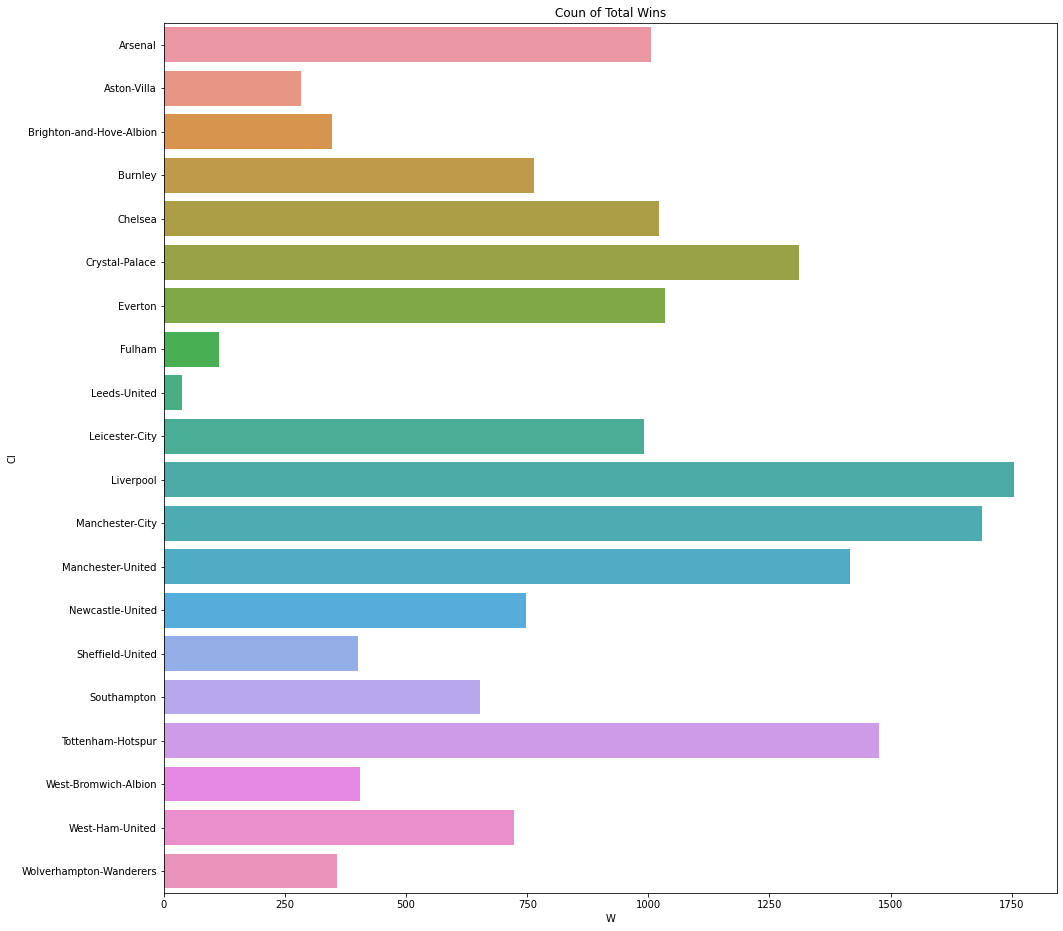

In [75]:
plt.figure(figsize=(16,16))
sns.barplot(y='Cl',x='W',data=d)
plt.title('Coun of Total Wins')

In [76]:
#Top Winners for Clubs
d.sort_values('W',ascending=False).head(1)

,W,Cl
285,1755,Liverpool


Text(0.5, 1.0, 'Coun of Total Losses')

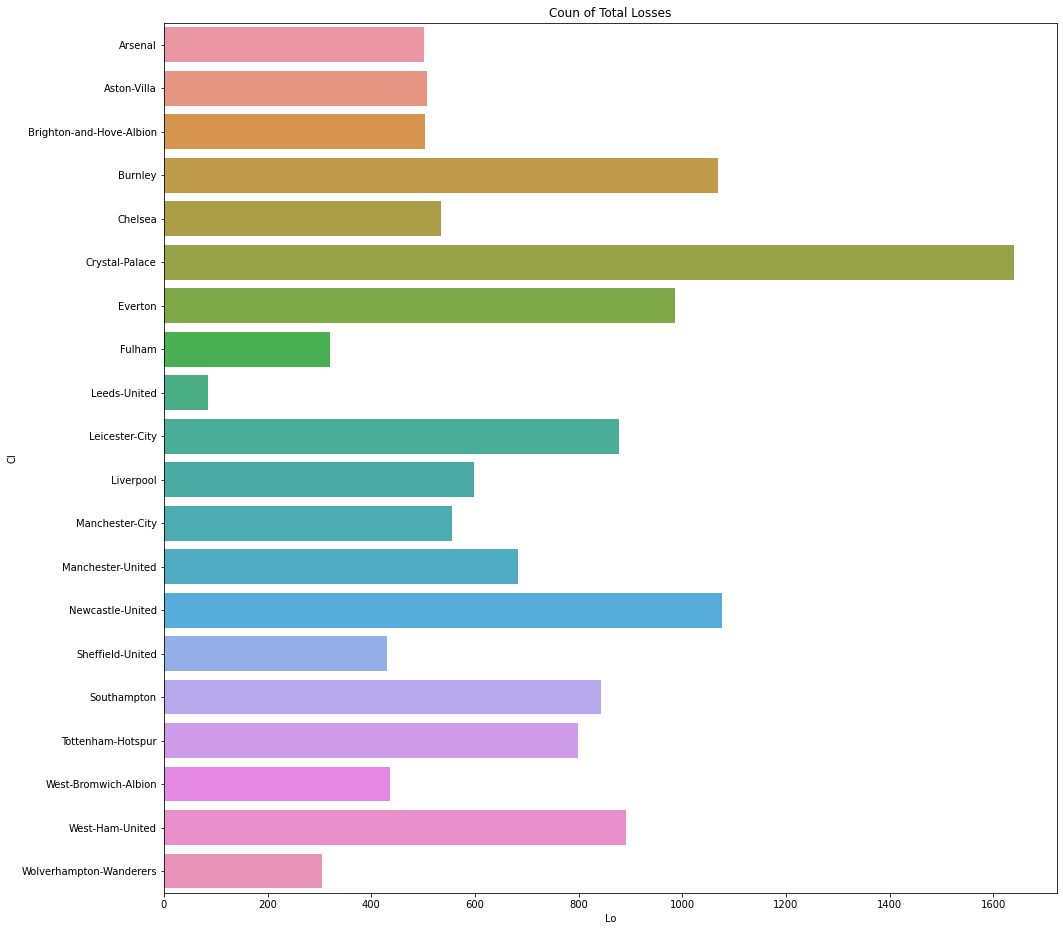

In [77]:
plt.figure(figsize=(16,16))
sns.barplot(y='Cl',x='Lo',data=d2)
plt.title('Coun of Total Losses')

In [78]:
#Most Losses for Clubs
d2.sort_values('Lo',ascending=False).head(1)

,Cl,Lo
142,Crystal-Palace,1640


In [79]:
top_players=pd.DataFrame();l=[];l2=[]
for i in df['Club']: 
    l.append(df.sort_values('Wins',ascending=False)[df['Club']==i]['Name'].head(1).values[0])
    l2.append(df.sort_values('Wins',ascending=False)[df['Club']==i]['Wins'].head(1).values[0])
top_players['N']=l
top_players['Wi']=l2


In [80]:
top_players.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Top Players')

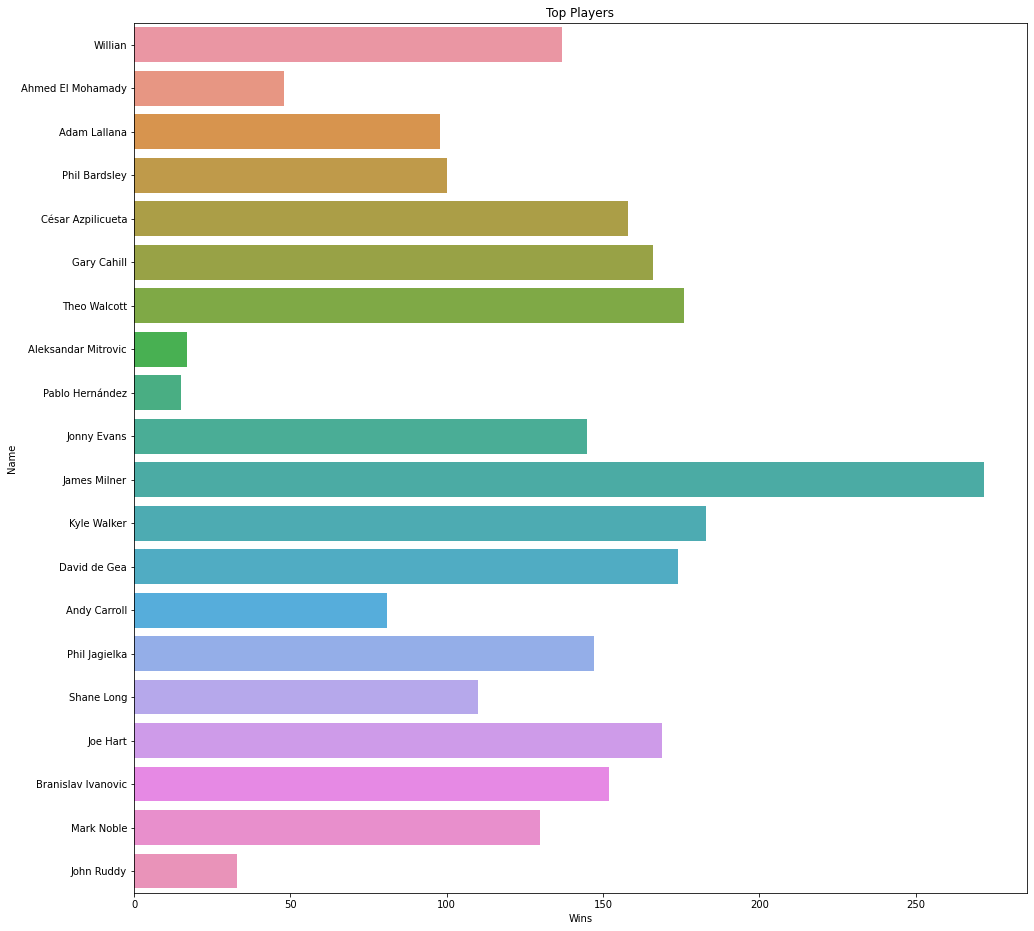

In [141]:
plt.figure(figsize=(16,16))
sns.barplot(y='N',x='Wi',data=top_players)
plt.xlabel('Wins');plt.ylabel('Name')
plt.title('Top Players')

In [82]:
#Top Winners for Players
top_players.sort_values('Wi',ascending=False).head(1)

,N,Wi
285,James Milner,272


In [83]:
Most_losses=pd.DataFrame();l=[];l2=[]
for i in df['Club']: 
    l.append(df.sort_values('Losses',ascending=False)[df['Club']==i]['Name'].head(1).values[0])
    l2.append(df.sort_values('Losses',ascending=False)[df['Club']==i]['Losses'].head(1).values[0])
Most_losses['N']=l
Most_losses['Lo']=l2


In [84]:
Most_losses.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Most Losses')

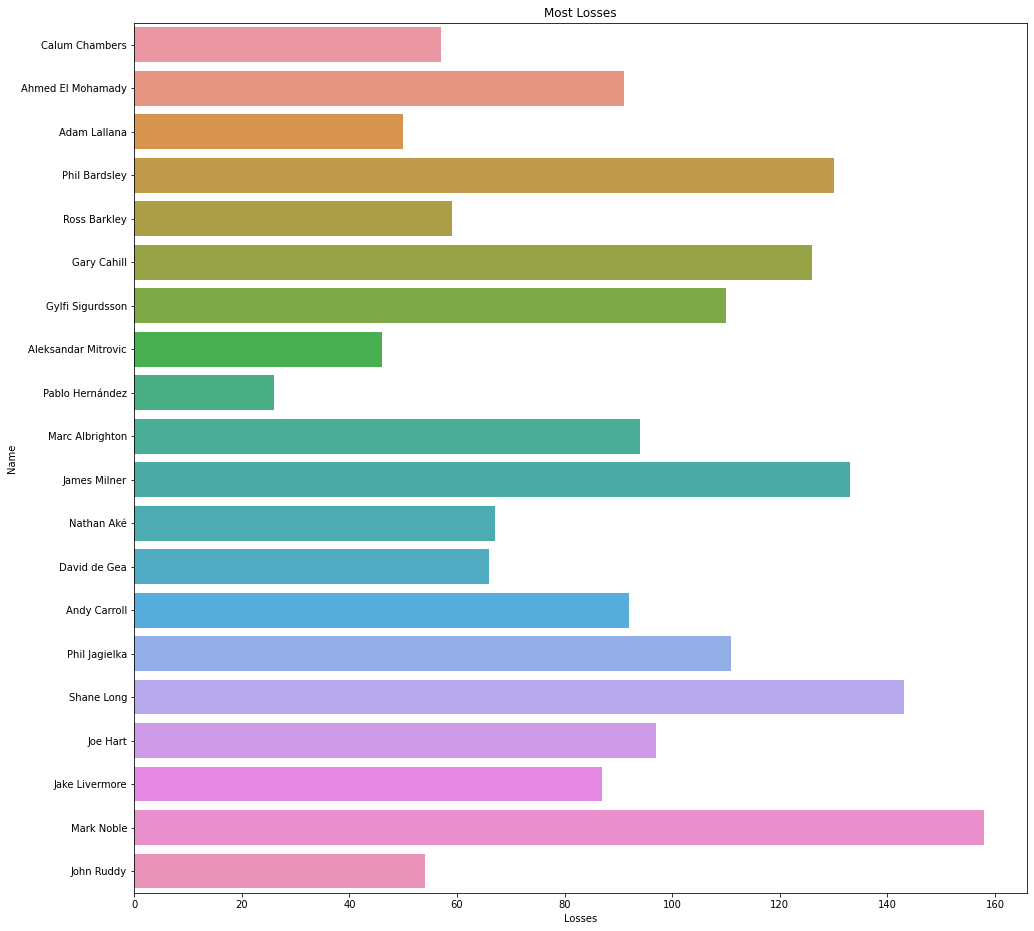

In [112]:
plt.figure(figsize=(16,16))
sns.barplot(y='N',x='Lo',data=Most_losses)
plt.xlabel('Losses');plt.ylabel('Name')
plt.title('Most Losses')

In [86]:
#Most Losses for Players
Most_losses.sort_values('Lo',ascending=False).head(1)

,N,Lo
519,Mark Noble,158


In [104]:
top_10=pd.DataFrame();top_10=df.sort_values('Goals',ascending=False).head(10)
top_10

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Totalwins,Totallosses
343,Sergio Agüero,Manchester-City,Forward,Argentina,32.0,263,177,44,180,0.68,...,0.0,0.0,0.0,0.0,23,1,167,194.0,1688,555
488,Harry Kane,Tottenham-Hotspur,Forward,England,27.0,212,120,48,144,0.68,...,0.0,0.0,0.0,0.0,26,0,208,160.0,1476,798
280,Jamie Vardy,Leicester-City,Forward,England,33.0,213,86,77,105,0.49,...,0.0,0.0,0.0,0.0,20,3,179,195.0,992,878
140,Olivier Giroud,Chelsea,Forward,France,33.0,238,133,56,86,0.36,...,0.0,0.0,0.0,0.0,18,2,223,120.0,1023,535
341,Raheem Sterling,Manchester-City,Forward,England,25.0,260,161,55,86,0.33,...,0.0,0.0,0.0,0.0,28,1,297,95.0,1688,555
312,Sadio Mané,Liverpool,Forward,Senegal,28.0,196,121,35,86,0.44,...,0.0,0.0,0.0,0.0,21,3,215,117.0,1755,599
313,Mohamed Salah,Liverpool,Forward,Egypt,28.0,123,90,12,78,0.63,...,0.0,0.0,0.0,0.0,4,0,63,65.0,1755,599
198,Theo Walcott,Everton,Forward,England,31.0,346,176,93,75,0.22,...,0.0,0.0,0.0,0.0,10,0,101,163.0,1035,986
169,Christian Benteke,Crystal-Palace,Forward,Belgium,29.0,225,73,107,72,0.32,...,0.0,0.0,0.0,0.0,35,3,357,203.0,1312,1640
185,Gylfi Sigurdsson,Everton,Midfielder,Iceland,31.0,284,114,110,61,0.21,...,0.0,0.0,0.0,0.0,20,0,193,16.0,1035,986


Text(0.5, 1.0, 'Top 10 Socrers')

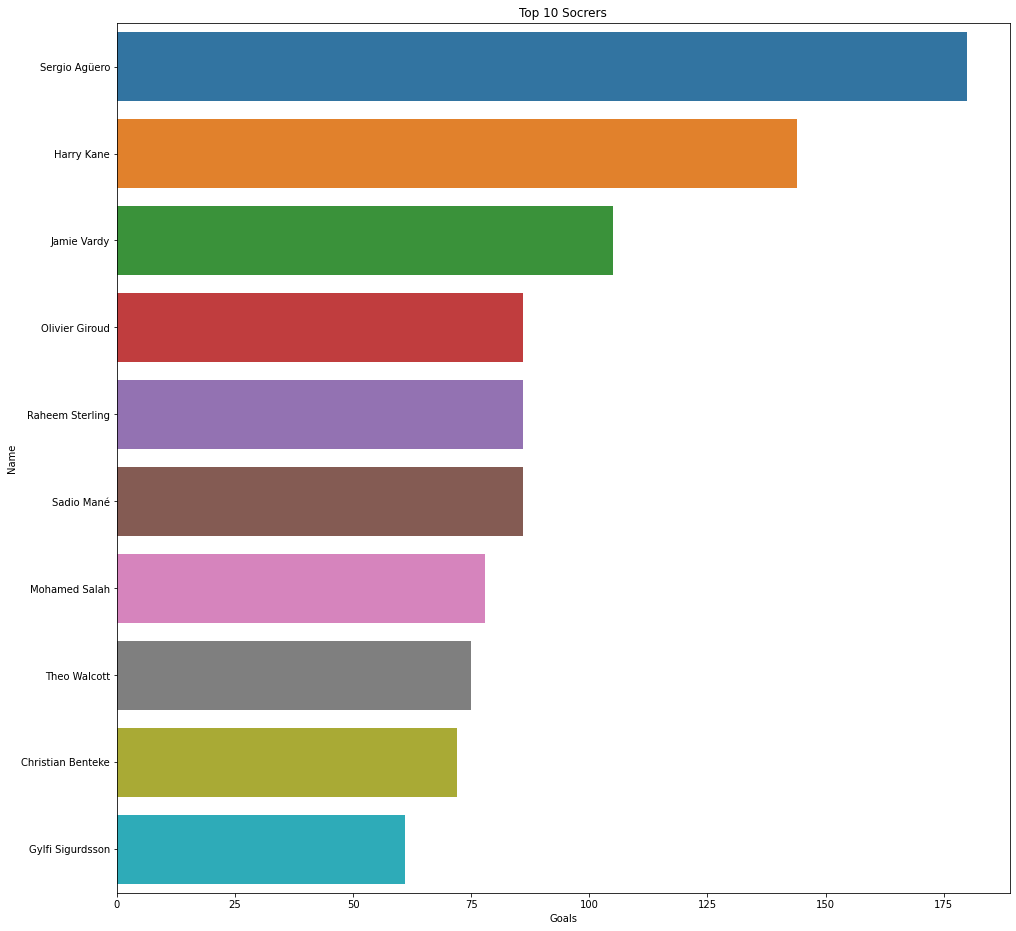

In [106]:
plt.figure(figsize=(16,16))
sns.barplot(y='Name',x='Goals',data=top_10)
plt.title('Top 10 Socrers')

In [147]:
top_10_goalkeepers=pd.DataFrame();top_10_goalkeepers=df.sort_values('Clean sheets',ascending=False).head(10)
top_10_goalkeepers

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Totalwins,Totallosses
461,Joe Hart,Tottenham-Hotspur,Goalkeeper,England,33.0,340,169,97,0,0.0,...,249.0,180.0,1516.0,2806.0,7,0,6,0.0,1476,798
346,David de Gea,Manchester-United,Goalkeeper,Spain,29.0,314,174,66,0,0.0,...,107.0,87.0,1205.0,2452.0,6,0,1,0.0,1417,684
418,Phil Jagielka,Sheffield-United,Defender,England,38.0,366,147,111,18,0.0,...,0.0,0.0,0.0,0.0,23,2,159,3.0,401,430
151,Gary Cahill,Crystal-Palace,Defender,England,34.0,374,166,126,27,0.0,...,0.0,0.0,0.0,0.0,38,3,266,3.0,1312,1640
323,Kyle Walker,Manchester-City,Defender,England,30.0,293,183,50,7,0.0,...,0.0,0.0,0.0,0.0,45,1,239,22.0,1688,555
122,César Azpilicueta,Chelsea,Defender,Spain,31.0,272,158,56,8,0.0,...,0.0,0.0,0.0,0.0,23,1,240,10.0,1023,535
459,Hugo Lloris,Tottenham-Hotspur,Goalkeeper,France,33.0,262,153,56,0,0.0,...,96.0,257.0,1234.0,1888.0,3,0,3,0.0,1476,798
503,Branislav Ivanovic,West-Bromwich-Albion,Defender,Serbia,36.0,261,152,50,22,0.0,...,0.0,0.0,0.0,0.0,55,2,293,18.0,405,437
260,Jonny Evans,Leicester-City,Defender,Northern Ireland,32.0,297,145,86,11,0.0,...,0.0,0.0,0.0,0.0,44,3,239,3.0,992,878
180,Séamus Coleman,Everton,Defender,Ireland,31.0,276,114,79,20,0.0,...,0.0,0.0,0.0,0.0,29,2,194,29.0,1035,986


Text(0.5, 1.0, 'Top 10 Goalkeepers')

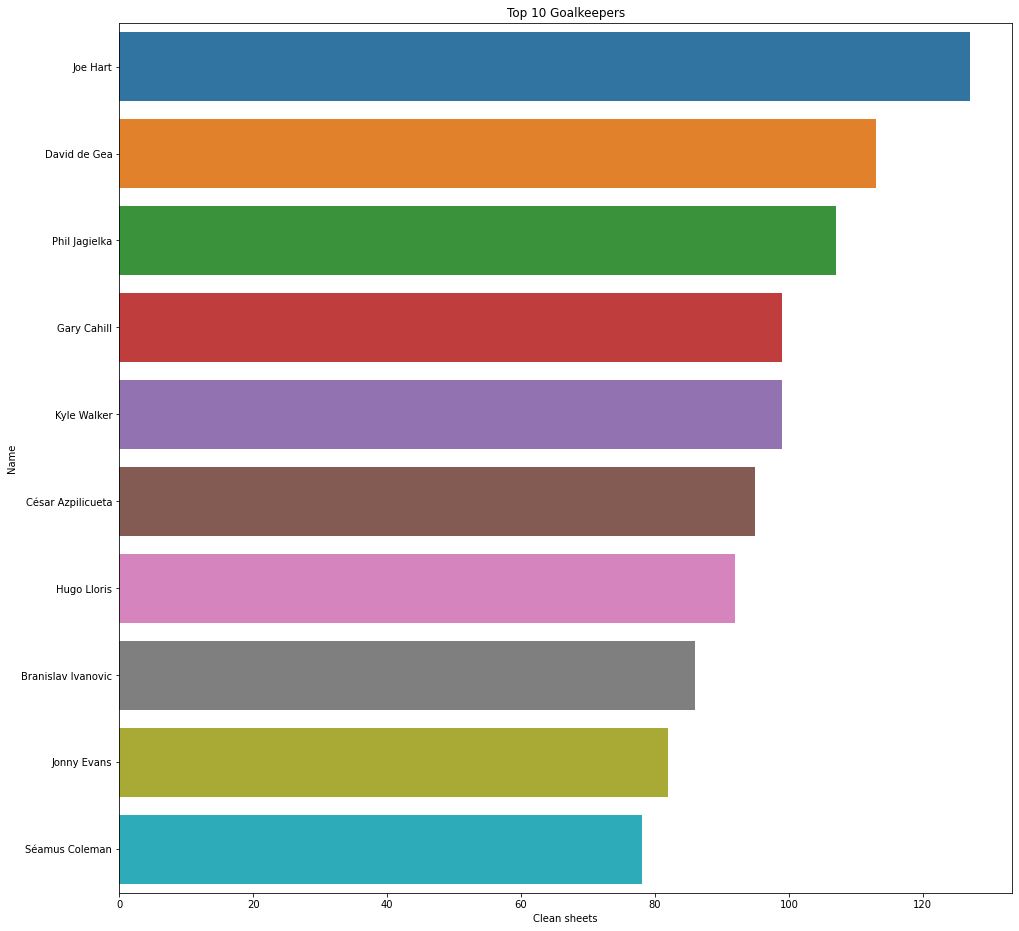

In [149]:
plt.figure(figsize=(16,16))
sns.barplot(y='Name',x='Clean sheets',data=top_10_goalkeepers)
plt.title('Top 10 Goalkeepers')

In [150]:
top_10_assistants=pd.DataFrame();top_10_assistants=df.sort_values('Assists',ascending=False).head(10)
top_10_assistants

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Totalwins,Totallosses
301,James Milner,Liverpool,Midfielder,England,34.0,539,272,133,55,0.10,...,0.0,0.0,0.0,0.0,65,3,438,45.0,1755,599
334,Kevin De Bruyne,Manchester-City,Midfielder,Belgium,29.0,156,109,22,37,0.24,...,0.0,0.0,0.0,0.0,14,0,122,16.0,1688,555
13,Mesut Özil,Arsenal,Midfielder,Germany,31.0,184,100,39,33,0.18,...,0.0,0.0,0.0,0.0,13,0,95,83.0,1005,502
364,Juan Mata,Manchester-United,Midfielder,Spain,32.0,262,136,61,51,0.19,...,0.0,0.0,0.0,0.0,19,1,134,102.0,1417,684
198,Theo Walcott,Everton,Forward,England,31.0,346,176,93,75,0.22,...,0.0,0.0,0.0,0.0,10,0,101,163.0,1035,986
303,Jordan Henderson,Liverpool,Midfielder,England,30.0,342,185,79,30,0.09,...,0.0,0.0,0.0,0.0,34,2,299,29.0,1755,599
343,Sergio Agüero,Manchester-City,Forward,Argentina,32.0,263,177,44,180,0.68,...,0.0,0.0,0.0,0.0,23,1,167,194.0,1688,555
185,Gylfi Sigurdsson,Everton,Midfielder,Iceland,31.0,284,114,110,61,0.21,...,0.0,0.0,0.0,0.0,20,0,193,16.0,1035,986
341,Raheem Sterling,Manchester-City,Forward,England,25.0,260,161,55,86,0.33,...,0.0,0.0,0.0,0.0,28,1,297,95.0,1688,555
344,Riyad Mahrez,Manchester-City,Forward,Algeria,29.0,199,98,58,57,0.29,...,0.0,0.0,0.0,0.0,7,0,117,45.0,1688,555


Text(0.5, 1.0, 'Top 10 Assitants')

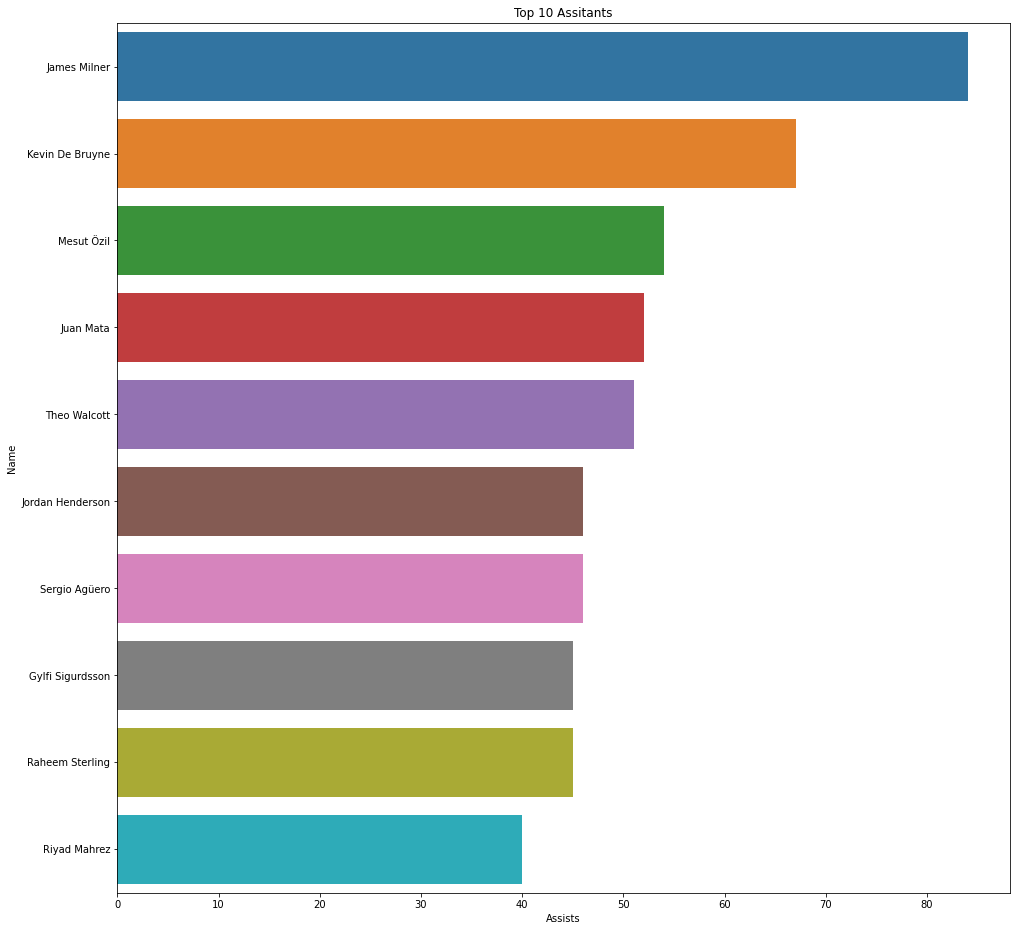

In [152]:
plt.figure(figsize=(16,16))
sns.barplot(y='Name',x='Assists',data=top_10_assistants)
plt.title('Top 10 Assitants')

In [165]:
top_10_def=pd.DataFrame();top_10_def=df[df['Position']=='Defender'].sort_values('Blocked shots',ascending=False).head(10)
top_10_def

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Totalwins,Totallosses
118,Marcos Alonso,Chelsea,Defender,Spain,29.0,140,87,32,20,0.0,...,0.0,0.0,0.0,0.0,25,1,125,16.0,1023,535
151,Gary Cahill,Crystal-Palace,Defender,England,34.0,374,166,126,27,0.0,...,0.0,0.0,0.0,0.0,38,3,266,3.0,1312,1640
10,David Luiz,Arsenal,Defender,Brazil,33.0,194,113,38,13,0.0,...,0.0,0.0,0.0,0.0,40,3,212,5.0,1005,502
99,Phil Bardsley,Burnley,Defender,Scotland,35.0,300,100,130,7,0.0,...,0.0,0.0,0.0,0.0,78,2,327,5.0,765,1068
323,Kyle Walker,Manchester-City,Defender,England,30.0,293,183,50,7,0.0,...,0.0,0.0,0.0,0.0,45,1,239,22.0,1688,555
147,Patrick van Aanholt,Crystal-Palace,Defender,Netherlands,30.0,191,57,92,20,0.0,...,0.0,0.0,0.0,0.0,19,0,94,27.0,1312,1640
180,Séamus Coleman,Everton,Defender,Ireland,31.0,276,114,79,20,0.0,...,0.0,0.0,0.0,0.0,29,2,194,29.0,1035,986
503,Branislav Ivanovic,West-Bromwich-Albion,Defender,Serbia,36.0,261,152,50,22,0.0,...,0.0,0.0,0.0,0.0,55,2,293,18.0,405,437
418,Phil Jagielka,Sheffield-United,Defender,England,38.0,366,147,111,18,0.0,...,0.0,0.0,0.0,0.0,23,2,159,3.0,401,430
441,Ryan Bertrand,Southampton,Defender,England,31.0,231,83,95,7,0.0,...,0.0,0.0,0.0,0.0,31,2,211,10.0,652,843


Text(0.5, 1.0, 'Top 10 Defenders')

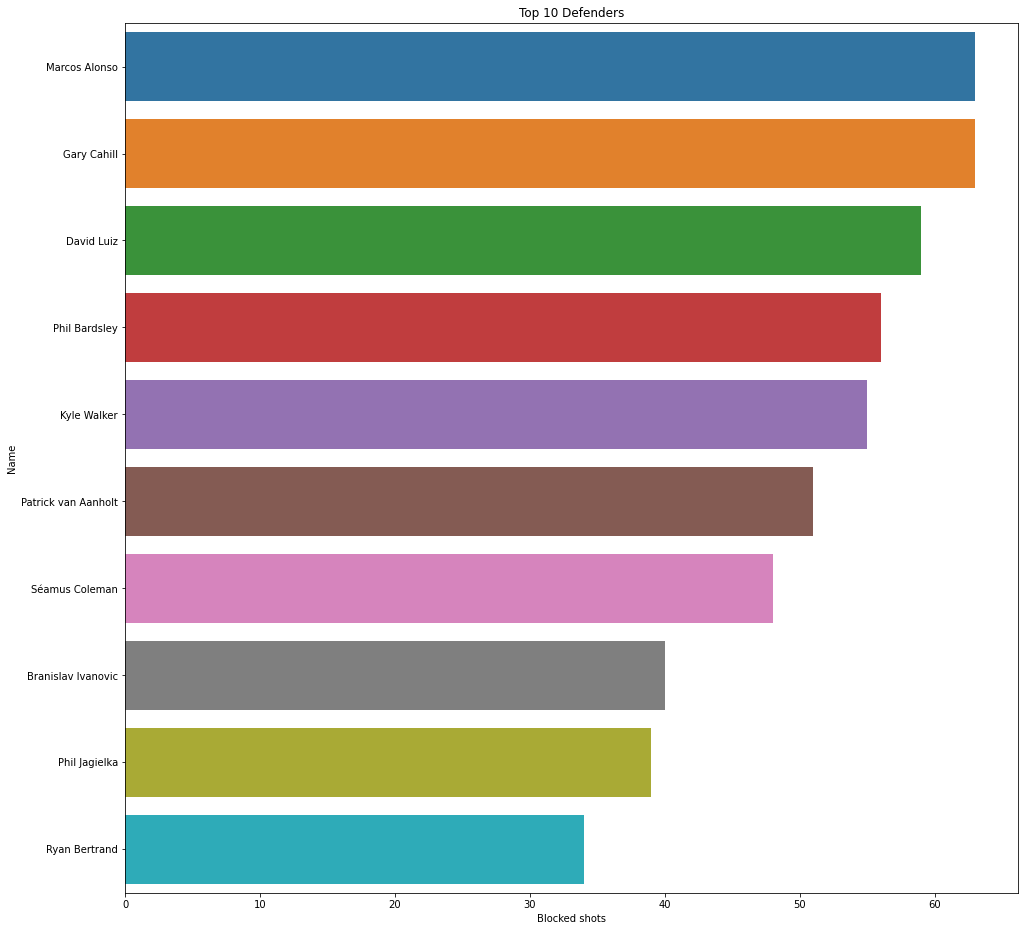

In [166]:
plt.figure(figsize=(16,16))
sns.barplot(y='Name',x='Blocked shots',data=top_10_def)
plt.title('Top 10 Defenders')

In [180]:
#Finally Top Club In Primer League is : "Liverpool"
Top_Club=pd.DataFrame()
Top_Club['Champion']=df[df['Club']=='Liverpool']['Club']
Top_Club['Win Matches']=df[df['Club']=='Liverpool']['Totalwins']
Top_Club.drop_duplicates(inplace=True)
Top_Club

,Champion,Win Matches
285,Liverpool,1755
